In [63]:
import math
import statistics
from scipy import stats as sps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# хи-квадрат распределение k=15 (df=15, loc=0(по умолчанию), scale=1(по умолчанию))
x_1 = sps.chi2.rvs(df=15, size=100)

# равномерное a=5, b=25 (loc=a, scale=b-a)
x_2 = sps.uniform.rvs(size=100, loc=5, scale=20) 

# выведем по 10 первых значений 1-й и 2-й выборки
print(x_1[:10])
print()
print(x_2[:10])

[26.25376708  9.94743659 14.25116145 23.28773591 14.30635016 21.02085627
 11.51196901 15.94337016  5.85600465 17.31416842]

[12.99704548 16.91341841 21.26524065 22.09311092 19.60667415 11.26843694
 21.87854611 14.41508953 23.60255555 18.98642187]


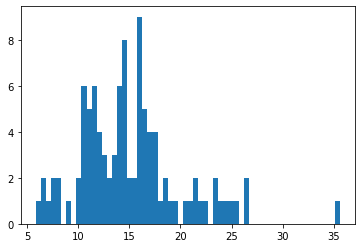

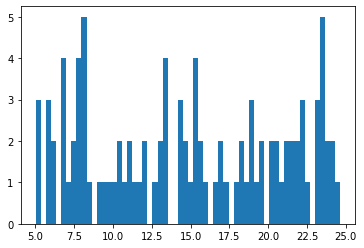

In [65]:
# гистограмма для 1-го распределения (bins - кол-во интервалов всех ячеек равной ширины)
plt.hist(x_1, bins=60)
plt.show()

# гистограмма для 2-го распределения
plt.hist(x_2, bins=60)
plt.show()

Формулы расчета статистических характеристик:

для $ X^2(k) $: 

* $ m_i = k  $

* $ D_i = 2k  $

для $ R(a,b) $:                
                                
* $ m_i = \frac{a + b}{2}  $      
                                
* $ D_i = \frac{(b - a)^2}{12}  $ 

In [66]:
m_1 = 15
sigma_1 = math.sqrt(30)
m_2 = (5 + 25) / 2
sigma_2 = math.sqrt((25 - 5) ** 2 / 12)

print('m_1: {:f}'.format(m_1))
print('sigma_1: {:f}'.format(sigma_1))
print('m_2: {:f}'.format(m_2))
print('sigma_2: {:f}'.format(sigma_2))

m_1: 15.000000
sigma_1: 5.477226
m_2: 15.000000
sigma_2: 5.773503


In [67]:
# среднее
mean_1 = x_1.mean()
mean_2 = x_2.mean()

print('mean_1: {:f}'.format(mean_1))
print('mean_2: {:f}'.format(mean_2))
print()

# оценка дисперсии
var_1 = x_1.var()
var_2 = x_2.var()

print('var_1: {:f}'.format(var_1))
print('var_2: {:f}'.format(var_2))
print()

# оценка с.к.о.
std_1 = x_1.std()
std_2 = x_2.std()

print('std_1: {:f}'.format(std_1))
print('std_2: {:f}'.format(std_2))

mean_1: 15.124385
mean_2: 14.851133

var_1: 25.014042
var_2: 36.878963

std_1: 5.001404
std_2: 6.072805


In [68]:
# pooled
pooled = np.concatenate([x_1, x_2])
pooled_mean = pooled.mean()
pooled_var = pooled.var()
pooled_std = pooled.std()

print('pooled_mean: {:f}'.format(pooled_mean))
print('pooled_var: {:f}'.format(pooled_var))
print('pooled_std: {:f}'.format(pooled_std))

pooled_mean: 14.987759
pooled_var: 30.965169
pooled_std: 5.564636


**2. Однопараметрические критерии**

In [69]:
from statsmodels.stats.weightstats import ztest as ztest

In [70]:
#z-test: 
#выводим выборочное значение статистики и p-value
#при p-value > a - гипотеза принимается
ztest(x_1, value=15)

(0.2474535993268442, 0.8045571973480057)

In [71]:
#t-test
#выводим выборочное значение статистики и p-value
#при p-value > a - гипотеза принимается
sps.ttest_1samp(a=x_1, popmean=15)

Ttest_1sampResult(statistic=0.2474535993268442, pvalue=0.8050696716182391)

In [72]:
#хи2-test: m - известно
#выводим выборочное значение статистики и p-value
#при p-value > a - гипотеза принимается
def one_sample_chi_test(x, m0, sigma0):
    S_squared = 1 / len(x) * sum([(i - m0) ** 2 for i in x])
    z = len(x) * S_squared / sigma0 ** 2
    f = sps.chi2.cdf(z, df=len(x))
    return z, 2 * min(f, 1 - f)

In [73]:
print(one_sample_chi_test(x_1, m_1, sigma_1))

(83.43171162250556, 0.23189681682241764)


In [74]:
#хи2-test: m - не известно
#выводим выборочное значение статистики и p-value
#при p-value > a - гипотеза принимается
def one_sample_chi_test_unknown(x, sigma0):
    S_squared = sum([(i - x.mean()) ** 2 for i in x]) / (len(x) - 1)
    z = (len(x) - 1) * S_squared / sigma0 ** 2
    f = sps.chi2.cdf(z, df=len(x)-1)
    return z,  min(f, 1 - f)/2

In [75]:
print(one_sample_chi_test_unknown(x_1, sigma_1))

(83.38013950384718, 0.06499655778255227)


**3. Двухвыборочные критерии**

In [76]:
sps.ttest_ind(a=x_1, b=x_2, equal_var=True)

Ttest_indResult(statistic=0.3455887363152111, pvalue=0.7300187011064814)

In [77]:
# t-test: mean_1 = mean_2 (sigma_1 = sigma_2)
def two_sample_t_test(x, y):
    S_1 = (1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])) 
    S_2 = (1 / (len(y) - 1) * sum([(i - y.mean()) ** 2 for i in y]))
    S = ((len(x) - 1) * S_1 + (len(y) - 1) * S_2) / (len(x) + len(y) - 2)
    z = (x.mean() - y.mean()) * (1 / len(x) + 1 / len(y)) ** 0.5 / S ** 0.5
    f = sps.t.cdf(z, df=len(x)+len(y)-1)
    return z,  min(f, 1 - f)/2

In [78]:
print(two_sample_t_test(x_1, x_2))

(0.006911774726304223, 0.2486230423729846)


In [79]:
# welch's t-test: mean_1 = mean_2 (sigma_1 != sigma_2)
def welch_t_test(x, y):
    S_1 = (1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])) 
    S_2 = (1 / (len(y) - 1) * sum([(i - y.mean()) ** 2 for i in y]))
    z = (x.mean() - y.mean()) / (S_1 / len(x) ** 2 + S_2 / len(y) ** 0.5) ** 0.5
    k = ((S_1 / len(x)) / (S_1 / len(x) + S_2 / len(y))) ** 2 / (len(x) - 1) + \
    ((S_1 / len(x)) / (S_1 / len(y) + S_2 / len(y))) ** 2 / (len(y) - 1)
    f = sps.t.cdf(z, df=int(1/k))
    return z, min(f, 1 - f)/2

In [80]:
print(welch_t_test(x_1, x_2))

(0.14152845901507438, 0.22188663250811563)


In [81]:
# f-test: var_1 = var_2 (m - known)
def two_sample_f_test(x, y, m1, m2):
    S_1 = 1 / len(x) * sum([(i - m1) ** 2 for i in x])
    S_2 = 1 / len(y) * sum([(i - m2) ** 2 for i in y])
    z = S_1 / S_2
    f = sps.f.cdf(z, dfn=len(x), dfd=len(y))
    return z,  min(f, 1 - f)/2

In [82]:
print(two_sample_f_test(x_1, x_2, m_1, m_2))

(0.6782859375489307, 0.013399429742594738)


In [83]:
# f-test: var_1 = var_2 (m - unknown)
def two_sample_f_test_unknown(x, y):
    S_1 = 1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])
    S_2 = 1 / (len(y) - 1) * sum([(i - y.mean()) ** 2 for i in y])
    z = S_1 / S_2
    f = sps.f.cdf(z, dfn=len(x)-1, dfd=len(y)-1)
    return z, min(f, 1 - f)/2

In [84]:
print(two_sample_f_test_unknown(x_1, x_2))

(0.6782740076869322, 0.013700677212369387)


**4. Исследование распределений статистик критерия**

Статистическая гипотеза: $ H_0: m_1 = 15\; (\sigma_1  - \text{известна})$


  Формула расчета статистики критерия $Z$: $ \; Z = \frac{\overline{X} - m}{{\sqrt{\frac{\sigma^2}{n}  }}} $
  
  Формула расчета статистики *p-value*: $ \text{p-value} = \min{\{F_Z(z|H_0), 1 - F_Z(z|H_0)\}/2} $
    
  Число серий эксперимента: $ \; N = 1000$


In [85]:
N = 1000
Z = []
PV = []
for i in range(N):
    x = sps.chi2.rvs(size =100, df = 15)
    z = (x.mean() - 15) * len(x) ** 0.5 / math.sqrt(30)
    Z.append(z)
    f = sps.norm.cdf(z, loc=0, scale=1)
    p =  min(f, 1-f)/2
    PV.append(p)
Z = np.array(Z)
PV = np.array(PV)

In [86]:
print(Z.mean())
print(Z.var())
print(Z.std())
print()

print(PV.mean())
print(PV.var())
print(PV.std())

0.034713191568054344
1.0509120563751322
1.0251400179366388

0.12099650636525473
0.0052127261673303015
0.07219921168080924


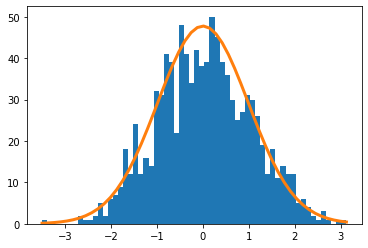

In [93]:
plt.hist(Z, bins=60)
grid = np.linspace(min(Z), max(Z))
plt.plot(grid, sps.t.pdf(grid, 98)*120, lw=3);

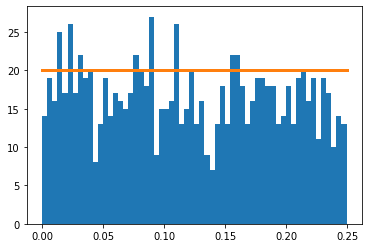

In [88]:
plt.hist(PV, bins=60)
grid = np.linspace(min(PV), max(PV))
plt.plot(grid, sps.uniform.pdf(grid, 0, 1) * 20, lw=3);